## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
#sys.path.insert(0, '/home/miguel/anaconda3/lib/python3.6/site-packages/scikit_image-0.15.dev0-py3.6-linux-x86_64.egg/')
import skimage
# Importing gempy
import gempy as gp
import matplotlib.pyplot as plt
# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

In [2]:
skimage.__version__

'0.15.dev0'

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [3]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models', recompile=False)

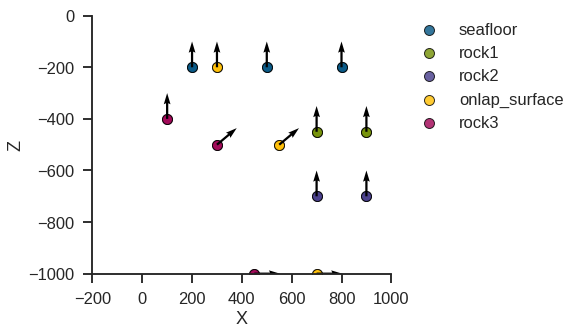

In [4]:
gp.plot.plot_data(geo_model)

In [5]:
gp.set_interpolation_data(geo_model, verbose=[])

/home/miguel/anaconda3/lib/python3.6/site-packages/skcuda/cublas.py:283: UserWarning: creating CUBLAS context to get version number
  warnings.warn('creating CUBLAS context to get version number')


Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [6]:
geo_model.set_regular_grid([-200,1000,-500,500,-1000,0], [50,50,50])

Grid Object. Values: 
array([[-188., -490., -990.],
       [-188., -490., -970.],
       [-188., -490., -950.],
       ...,
       [ 988.,  490.,  -50.],
       [ 988.,  490.,  -30.],
       [ 988.,  490.,  -10.]])

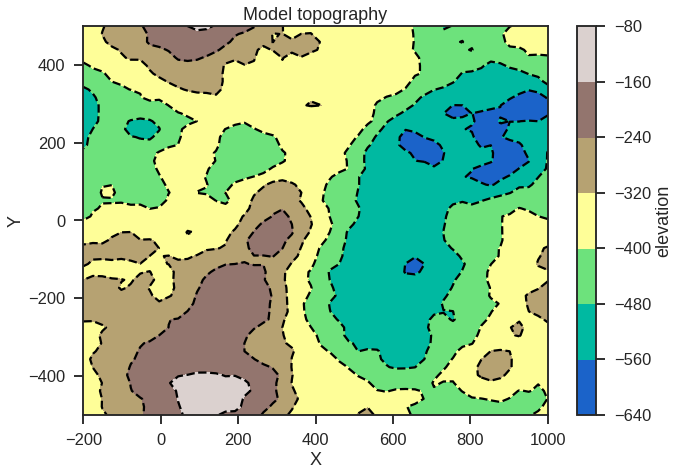

In [7]:
geo_model.set_topography(d_z=np.array([-600,-100]))

Now topography exist but not activated:

In [8]:
geo_model.grid.set_active('topography')

In [9]:
s = gp.compute_model(geo_model, compute_mesh=True, debug=False)

In [10]:
geo_model.solutions.geological_map

array([[5., 5., 5., ..., 2., 2., 2.]])

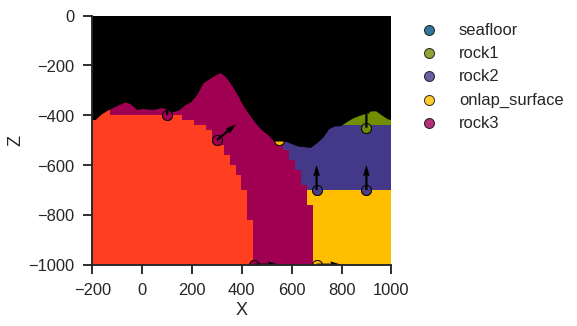

In [11]:
gp.plot.plot_section(geo_model, 25, show_data=True)

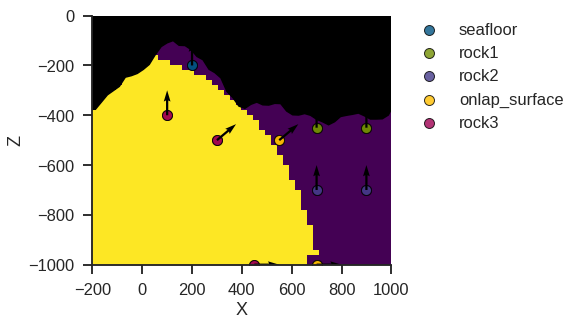

In [12]:
gp.plot.plot_section(geo_model, 2, block=geo_model.solutions.mask_matrix_pad[3].T, show_data=True,
                    )

In [13]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [14]:
vtkp = gp.plot.plot_3D(geo_model, render_surfaces=True, render_data=False)

holding... Use vtk.resume to go back to the interactive window


In [15]:
vtkp.set_real_time_on()

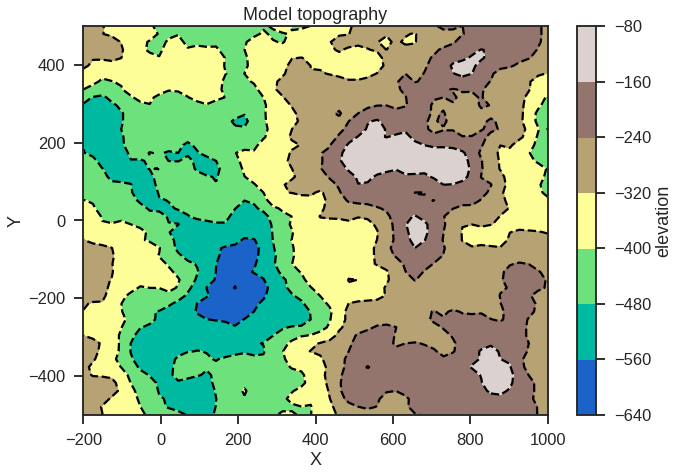

In [22]:
geo_model.set_topography(d_z=np.array([-600,-100]), plot_object=vtkp)

In [17]:
vtkp.resume()

holding... Use vtk.resume to go back to the interactive window


In [18]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


In [ ]:
gp.plot.plot_section(geo_model, 2, direction='y', block=geo_model.solutions.mask_matrix_pad[2].T,
                show_topo=False)

In [ ]:
gp.compute_model(geo_model)

In [ ]:
vtkp = gp.plot.plot_3D(geo_model)

In [ ]:
vtkp.set_real_time_on()

In [ ]:
geo_model.set_topography(d_z=np.array([-600,-100]), plot_object= vtkp)

In [ ]:
vtkp.resume()

Save model if any changes were made:

In [ ]:
# geo_model.save_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models',)